__Задание 1__

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

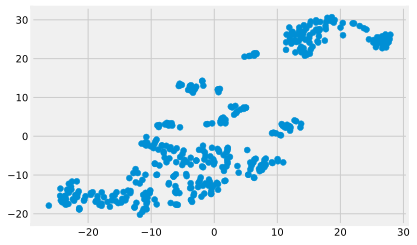

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

__Задание 2__

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
clusters_count = 3
kmeans = KMeans(n_clusters=clusters_count, max_iter=100, random_state=42)

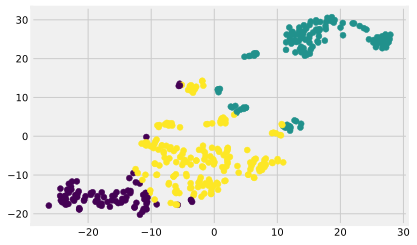

In [10]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [11]:
for i in range(clusters_count):
    print(f'Средняя цена в кластере {i}: {y_train[labels_train == i].mean()}')
    print(f'Средний уровень криминальности в кластере {i}: {X_train.loc[labels_train == i, "CRIM"].mean()}')

Средняя цена в кластере 0: 27.78837209302326
Средний уровень криминальности в кластере 0: 0.07356558139534886
Средняя цена в кластере 1: 16.165354330708663
Средний уровень криминальности в кластере 1: 10.797028425196853
Средняя цена в кластере 2: 24.958115183246072
Средний уровень криминальности в кластере 2: 0.42166020942408367


__*Задание 3__

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [12]:
labels_test = kmeans.predict(X_test_scaled)

In [13]:
for i in range(clusters_count):
    print(f'Средняя цена в кластере {i}: {y_test[labels_test == i].mean()}')
    print(f'Средний уровень криминальности в кластере {i}: {X_test.loc[labels_test == i, "CRIM"].mean()}')

Средняя цена в кластере 0: 31.35
Средний уровень криминальности в кластере 0: 0.062060000000000004
Средняя цена в кластере 1: 16.43714285714286
Средний уровень криминальности в кластере 1: 10.165531142857143
Средняя цена в кластере 2: 21.860784313725492
Средний уровень криминальности в кластере 2: 0.26607882352941176


Оценка по r2_score (из интереса)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [15]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [16]:
y_pred_rfr = model.predict(X_test_scaled)

In [17]:
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_rfr

0.8812087495427665

In [18]:
y_test_pred = {}
for i in range(clusters_count):
    model.fit(X_train_scaled.loc[labels_train == i], y_train[labels_train == i])
    y_test_pred[i] = model.predict(X_test_scaled.loc[labels_test == i])
    print(f'r2_score для кластера {i}: {r2_score(y_test[labels_test == i], y_test_pred[i])}')

r2_score для кластера 0: 0.9184741688835861
r2_score для кластера 1: 0.6645783573381328
r2_score для кластера 2: 0.8743211013425174


In [19]:
y_test_all = np.hstack([y_test[labels_test == i] for i in range(clusters_count)])
y_test_pred_all = np.hstack([y_test_pred[i] for i in range(clusters_count)])

print(f'r2_score по совокупности кластеров: {r2_score(y_test_all, y_test_pred_all)}')

r2_score по совокупности кластеров: 0.8638986142863765


Видно, что RandomForest даёт лучший результат.

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [21]:
y_test_pred = {}
for i in range(clusters_count):
    lr.fit(X_train_scaled.loc[labels_train == i], y_train[labels_train == i])
    y_test_pred[i] = lr.predict(X_test_scaled.loc[labels_test == i])
    print(f'r2_score для кластера {i}: {r2_score(y_test[labels_test == i], y_test_pred[i])}')

r2_score для кластера 0: 0.9155161972050824
r2_score для кластера 1: 0.522832708076564
r2_score для кластера 2: 0.7215240423132002


In [22]:
y_test_all = np.hstack([y_test[labels_test == i] for i in range(clusters_count)])
y_test_pred_all = np.hstack([y_test_pred[i] for i in range(clusters_count)])

print(f'r2_score по совокупности кластеров: {r2_score(y_test_all, y_test_pred_all)}')

r2_score по совокупности кластеров: 0.7954214722324011


Для линейной регрессии результат улучшился.